In [6]:
import sys
sys.path.append("/sdf/group/ad/beamphysics/jytang/cavity_genesis4_20keV/cavity_genesis4") 
from genesis4.lume_genesis_JT import Genesis4
from genesis4.lume_genesis_JT.plot import plot_stats
import numpy as np
import matplotlib.pyplot as plt
import os
from constants import *

In [8]:
slen/3e8

2e-14

In [7]:
slen = 6e-6
sample = 16
lambda0 = 1.2e-10
slen/lambda0/sample

3125.0

## Load archive

In [3]:
basedir = '/sdf/data/ad/ard/u/jytang/test_genesis4/'
# basedir = './run3_moreheater/'
files = np.array(os.listdir(basedir))
files = files[np.array(['K' in file for file in files])]
files = files[np.array(['taper0_' in file for file in files])]
files = files[np.array(['tt' in file for file in files])]
files = files[np.array(['.out.h5' not   in file for file in files])]

#files = files[np.array(['h5'   in file for file in files])]
#files = files[np.array(['Run2'   in file for file in files])]

files = files[np.array(['fld'  not in file for file in files])]
files = files[np.array(['lat'  not in file for file in files])]
files = files[np.array(['beam'  not in file for file in files])]
files = files[np.array(['in'  not in file for file in files])]
files = files[np.array(['par'  not in file for file in files])]
#files = files[np.array(['out'  not in file for file in files])]
files = files[np.array(['err'  not in file for file in files])]
files = np.sort(files)
files



array(['K0.4335_taper0_tt'], dtype='<U30')

In [4]:

Glist = []
for file in files:
    G = Genesis4(workdir = basedir + file, use_temp_dir = False)
    G.load_archive(basedir + file + '/' + file + '.out.h5')
    Glist.append(G)

In [5]:
G.output_info()

Output data

key                       value              unit
--------------------------------------------------
Beam/LSCfield             array: (1341, 9600)  eV/m
Beam/SSCfield             array: (1341, 9600)  eV/m
Beam/alphax               array: (1, 9600)   rad
Beam/alphay               array: (1, 9600)   rad
Beam/betax                array: (1, 9600)   m
Beam/betay                array: (1, 9600)   m
Beam/bunching             array: (1341, 9600)  
Beam/bunchingphase        array: (1341, 9600)  rad
Beam/current              array: (1341, 9600)  A
Beam/efield               array: (1341, 9600)  eV/m
Beam/emax                 array: (1341, 9600)  m_ec^2
Beam/emin                 array: (1341, 9600)  m_ec^2
Beam/emitx                array: (1, 9600)   m
Beam/emity                array: (1, 9600)   m
Beam/energy               array: (1341, 9600)  m_ec^2
Beam/energyspread         array: (1341, 9600)  m_ec^2
Beam/pxmax                array: (1341, 9600)  rad
Beam/pxmin                arr

In [6]:
gam0 = G.output['Global/gamma0']
xlamds = G.output['Global/lambdaref']
zsep = G.output['Global/sample']
dgird = G.output['Field/dgrid']
ncar = G.output['Field/ngrid']
h_Plank = H_PLANK;      # Plank constant [eV-sec]
c_speed  = CSPEED;           # speed of light[m/sec]
hw0 = h_Plank * c_speed / xlamds
dt = xlamds*zsep/c_speed

In [7]:
20e-15/dt

9509.300019325967

(0.0, 2.0)

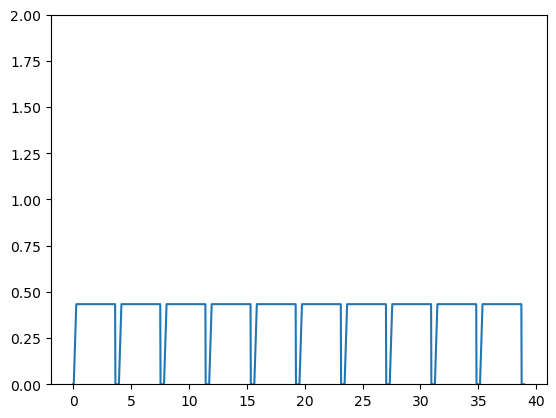

In [8]:
for G in Glist:
    z = G.output['Lattice/z']
    aw = G.output['Lattice/aw']
    plt.plot(z, aw)
plt.ylim([0, 2])

In [9]:
z = G.output['Lattice/z']

Text(0, 0.5, 'energy(MeV)')

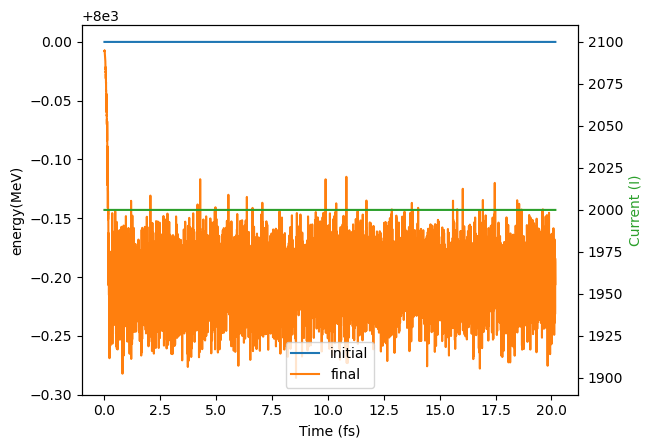

In [10]:
energy_init = G.output['Beam/energy'][0, :]
energy_final = G.output['Beam/energy'][-1,:]
current = G.output['Beam/current']
currlist = current[0,:]
s = G.output['Global/s']
plt.plot(s/3e8*1e15, energy_init*0.511, color = 'C0', label = 'initial')
plt.plot(s/3e8*1e15, energy_final*0.511, color = 'C1', label = 'final')
plt.legend()
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(s/3e8*1e15, currlist, color = 'C2')
ax.set_xlabel('Time (fs)')
ax2.set_ylabel('Current (I)', color = 'C2')
ax.set_ylabel('energy(MeV)')

## Plot Power Gain

Text(0, 0.5, 'Number of photons')

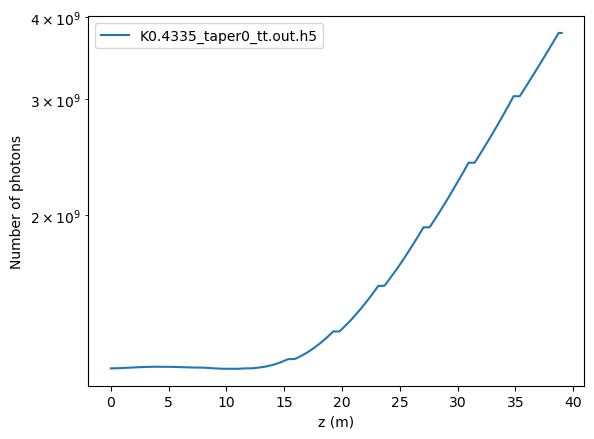

In [11]:
num_photon_list = []
for count, G in enumerate(Glist):
    z = G.output['Lattice/zplot']
    label = G.output['outfile'].split('/')[-1]
    power = np.amax(G.output['Field/power'], axis = 1)
    energy = np.sum(G.output['Field/power'], axis = 1)*dt
    num_photon = energy/(hw0*1.60218e-19)
    num_photon_list.append(num_photon[-1])
    plt.plot(z, num_photon, label = label)
    plt.yscale('log')
plt.legend()
plt.xlabel('z (m)')
plt.ylabel('Number of photons')

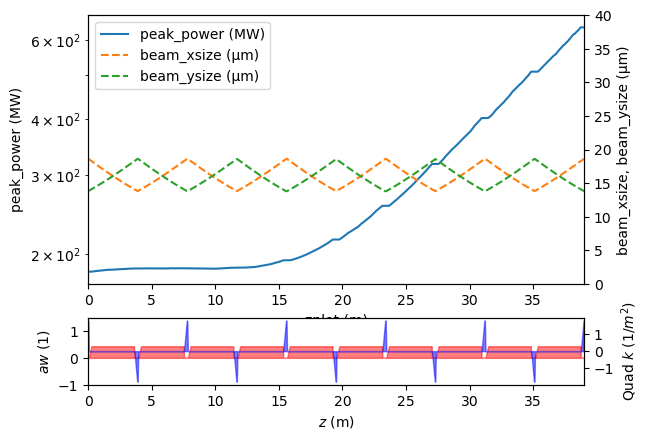

In [12]:
G.plot('field_power', yscale='log', y2 = ['beam_xsize', 'beam_ysize'], ylim2=(0, 40e-6))

## Plot Power Profile

In [13]:
G.output['Field/power'].shape

(1341, 9600)

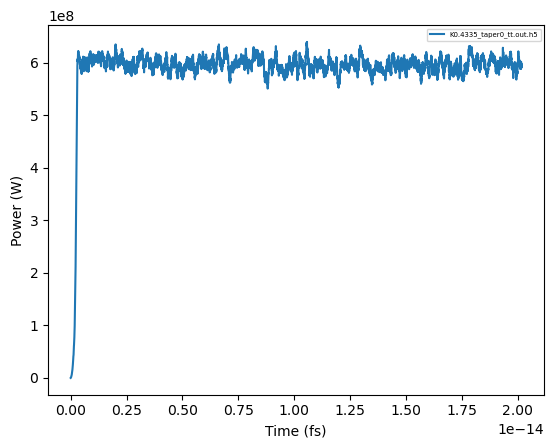

In [14]:
for count, G in enumerate(Glist):
    s = G.output['Global/s']
    label = G.output['outfile'].split('/')[-1]
    intensity = G.output['Field/power'][-1,:]
    plt.plot(s/3e8, intensity, label = label)
    #plt.yscale('log')
    #ax = plt.gca()
    #ax2 = ax.twinx()
    #ax2.plot(s/3e8, phase)
plt.xlabel('Time (fs)')
plt.ylabel('Power (W)')
plt.legend(fontsize = 5)

## Load field

In [2]:
import h5py
from genesis4.lume_genesis_JT.readers import load_genesis4_fields

In [3]:
fld_filename = '/sdf/data/ad/ard/u/jytang/cavity_genesis4_20keV//test1//n1_seed_init.fld.h5'
with h5py.File(fld_filename, 'r') as h5:
    dfl, param = load_genesis4_fields(h5)

In [4]:
dfl.shape

(181, 181, 8192)

In [5]:
param

{'gridpoints': 181,
 'gridsize': 1.1111111111111112e-06,
 'refposition': 0.0,
 'wavelength': 6.30524765e-11,
 'slicecount': 960,
 'slicespacing': 6.3052476499999996e-09}

In [ ]:
from recirculation import 

In [6]:
param

{'gridpoints': 181,
 'gridsize': 1.1111111111111112e-06,
 'refposition': 0.0,
 'wavelength': 6.30524765e-11,
 'slicecount': 9600,
 'slicespacing': 6.305247649999999e-10}

In [7]:
from genesis4.lume_genesis_JT.writers import *
dfl2 = np.moveaxis(dfl, -1, 0)
write_dfl_genesis4_h5(fld = dfl2, param = param, filename = '/sdf/data/ad/ard/u/jytang/test_genesis4/K0.4335_taper0_tt/test.h5', indexing = 'Genesis2')

Assuming fld in dimension [t, x, y], writing field to h5 file  /sdf/data/ad/ard/u/jytang/test_genesis4/K0.4335_taper0_tt/test.h5


In [8]:
with h5py.File('/sdf/data/ad/ard/u/jytang/test_genesis4/K0.4335_taper0_tt/test.h5', 'r') as h5:
    dfl, param = load_genesis4_fields(h5)

In [9]:
dfl.shape

(181, 181, 9600)

In [56]:
?write_dfl_genesis4_h5

Object `write_dfl_genesis4_h5` not found.


In [ ]:
G.

In [27]:
dfl = G.field[files[0]]['dfl']
param = G.field[files[0]]['param']

In [28]:
dfl.flags['C_CONTIGUOUS']

True

In [29]:
t0 = time.time()
test = np.asfortranarray(dfl)
print(time.time() - t0)

2.410334587097168


In [19]:
test.flags['F_CONTIGUOUS']

True

In [20]:
nslice = param['slicecount']
xlamds = param['wavelength']
dx = param['gridsize']
dt = param['slicespacing']/CSPEED

In [21]:
dfl.shape

(181, 181, 9600)

In [30]:
dfl = np.moveaxis(dfl, -1, 0)

In [31]:
dfl.shape

(9600, 181, 181)

In [35]:
t0 = time.time()
TEST = np.ascontiguousarray(dfl)
print(time.time() - t0)

2.9726316928863525


In [36]:
test2 = np.ascontiguousarray(TEST)

In [40]:
test3 = np.ascontiguousarray(np.real(TEST))

In [12]:
dat2 = np.abs(np.sum(dfl, axis=2))**2

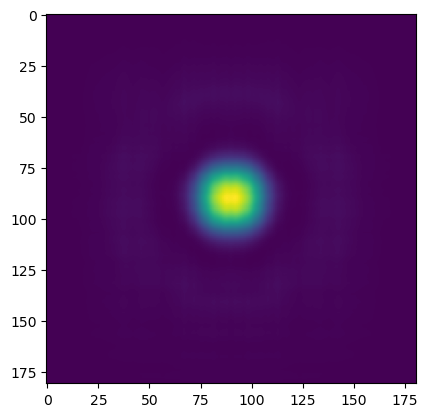

In [13]:
plt.imshow(dat2)

## Plot spectrum

In [ ]:
from genesis.version4 import parsers, writers, readers
import h5py
cspeed =299792458
h_Plank = 4.135667696e-15
npad = 10000
spectrum_list = []

for count, G in enumerate(Glist):
    ncar = int(G.output['Field/ngrid'])
    dgrid = G.output['Field/dgrid']
    xlamds = G.output['Global/lambdaref']
    sample = G.output['Global/sample']
    dt = xlamds*sample/cspeed

    #phase_nearfield = G.output['Field/phase-nearfield'][-1, :]
    #intensity_nearfield = G.output['Field/intensity-nearfield'][-1, :]
    G.load_fields()
    dfl = G.field[files[count]]['dfl']
    param = G.field[files[count]]['param']
    
    #central = dfl[ncar//2 +1, ncar//2 + 1, :]
    nslice = dfl.shape[2]
    nslice_padded = nslice + 2*npad
    s = np.arange(nslice)*dt
    s2 = np.arange(nslice_padded) * dt
    s_fs2 = s2*1e15
    hw0_eV = h_Plank * cspeed / xlamds
    Dhw_eV = h_Plank / dt 
    hws = hw0_eV + Dhw_eV / 2. * np.linspace(-1.,1., nslice_padded)

    central_padded = np.pad(dfl, ((0,0), (0,0),(npad, npad)))
    ftfld = np.fft.fftshift(np.fft.fft(central_padded, axis = 2), axes = 2)
    spectrum = np.sum(np.abs(ftfld)**2, axis = (0, 1))

    spectrum_list.append((hws,spectrum))

In [ ]:
count = 0
spec_ave = np.zeros(spectrum_list[0][1].shape)
for hws, spec in spectrum_list:
    plt.plot(hws, spec, label = files[count], alpha = 1.0)
    plt.xlim([9828,9835])
    plt.xlabel('Photon energy (eV)')
    count += 1
    spec_ave += spec
    #plt.legend()
spec_ave /= (count + 1)
#plt.plot(hws, spec_ave, color = 'k')

In [222]:
import pickle
pickle.dump((hws, spec_ave, spectrum_list), open( "./data/stage2/chirp40.p", "wb" ) )

In [193]:
## Get photon number within 100meV
ind_peak = np.argmax(spec_ave)
hws0 = hws[ind_peak]
ind = (hws < hws0 + 0.05)&(hws > hws0 - 0.05)
np.sum(spec[ind])/np.sum(spec)*np.sum(num_photon_list)/5/1e6

50.242637289085934

In [ ]:
[50e6, ]

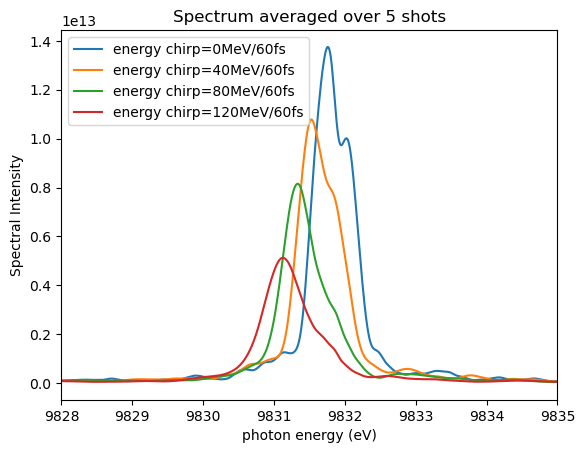

In [227]:
for chirp in [0, 40, 80, 120]:
    data = pickle.load( open("./data/stage2/chirp" + str(chirp)+".p", "rb" ) )
    hws = data[0]
    spec_av = data[1]
    plt.plot(hws, spec_av, label = 'energy chirp=' + str(chirp) +'MeV/60fs')
    plt.xlim([9828,9835])
    plt.xlabel('photon energy (eV)')
    plt.ylabel('Spectral Intensity')
    plt.title('Spectrum averaged over 5 shots')
    plt.legend()

## 2D plots

In [60]:
def make_zs_plot(pdat, zlist, slist_fs, currlist, energylist_init, energylist_fin, ax = None, label = ''):
    if not ax:
        fig, ax = plt.subplots()
    
    currlist_scaled = currlist - 0*np.min(currlist)
    currlist_scaled /= np.max(currlist_scaled)
    currlist_scaled *= np.max(zlist) - np.min(zlist)
    currlist_scaled += np.min(zlist)
    energylist_init_scaled = energylist_init - np.min(energylist_fin)
    energylist_init_scaled /= np.max(energylist_init_scaled)
    energylist_init_scaled *= np.max(zlist) - np.min(zlist)
    energylist_init_scaled += np.min(zlist)
    energylist_fin_scaled = energylist_fin - np.min(energylist_fin)
    energylist_fin_scaled /= np.max(energylist_fin_scaled)
    energylist_fin_scaled *= np.max(zlist) - np.min(zlist)
    energylist_fin_scaled += np.min(zlist)
    
    #pdat = np.reshape(np.array(outputdat.iloc[:,ia]), [int(outputdat.shape[0] / len(zlist)), len(zlist)]).T
    im = ax.imshow(pdat, interpolation = 'none', extent = [slist_fs[0], slist_fs[-1], zlist[0], zlist[-1]], origin = 'lower', aspect = 0.75*(slist_fs[-1] - slist_fs[0]) / (zlist[-1] - zlist[0]))
    ax.set_xlabel('$s$ (fs)')
    ax.set_ylabel('$z$ (m)')

    cbar = fig.colorbar(im, ax = ax)
    cbar.set_label(label, rotation = 270)
    ax.plot(slist_fs, currlist_scaled, 'w', alpha = 0.5, scalex = False, scaley = False);
    ax.plot(slist_fs, energylist_init_scaled, '#ff9900', alpha = 0.5, scalex = False, scaley = False);
    ax.plot(slist_fs, energylist_fin_scaled, '#ff9900', alpha = 0.25, scalex = False, scaley = False);

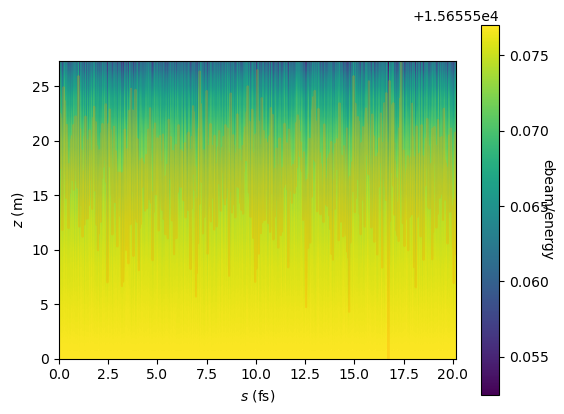

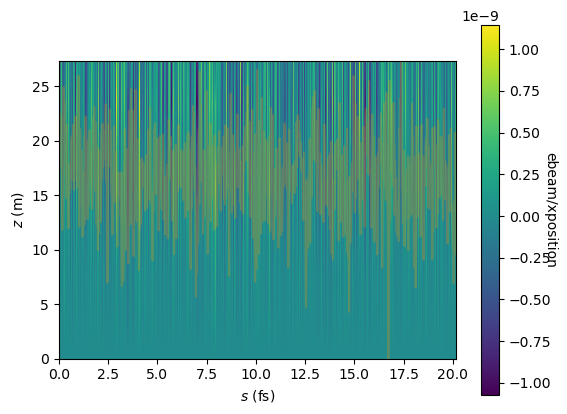

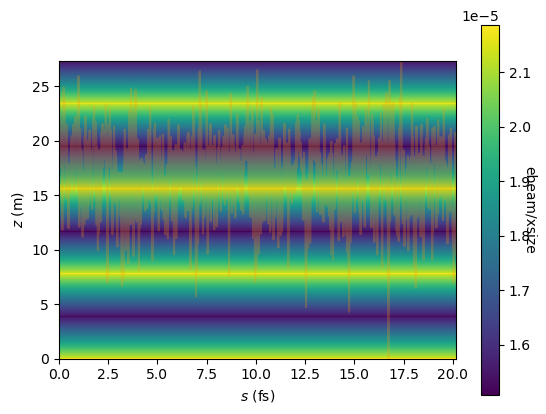

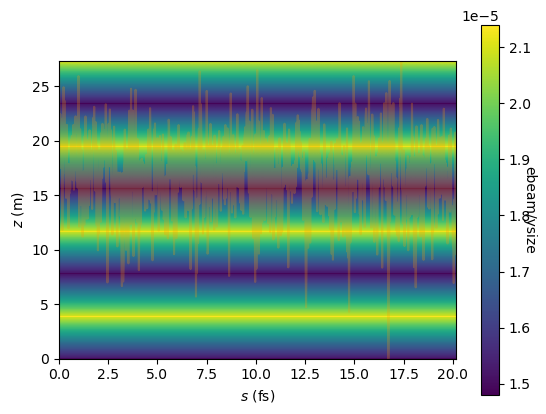

In [65]:
zlist = G.output['Lattice/zplot']
slist_fs = G.output['Global/s']/3e8*1e15
beam_energy = G.output['Beam/energy']
make_zs_plot(pdat = beam_energy, zlist = zlist, slist_fs = slist_fs, currlist = currlist, 
             energylist_init = energy_init, energylist_fin = energy_final, label = 'ebeam/energy')

beam_xposition =G.output['Beam/xposition']

make_zs_plot(pdat =beam_xposition, zlist = zlist, slist_fs = slist_fs, currlist = currlist, 
             energylist_init = energy_init, energylist_fin = energy_final, label = 'ebeam/xposition')

beam_yposition = G.output['Beam/yposition']
beam_xsize = G.output['Beam/xsize']
make_zs_plot(pdat =beam_xsize, zlist = zlist, slist_fs = slist_fs, currlist = currlist, 
             energylist_init = energy_init, energylist_fin = energy_final, label = 'ebeam/xsize')

beam_ysize = G.output['Beam/ysize']
make_zs_plot(pdat =beam_ysize, zlist = zlist, slist_fs = slist_fs, currlist = currlist, 
             energylist_init = energy_init, energylist_fin = energy_final, label = 'ebeam/ysize')
beam_bunching = G.output['Beam/bunching']
field_xsize = G.output['Field/xsize']
field_ysize = G.output['Field/ysize']

## Plot Spectrum

In [43]:
from genesis.version4 import parsers, writers, readers
import h5py
angle_list = []
spectrum_list = []
for count, G in enumerate(Glist):
    print(count)
    filename = './output_phase_10keV/K1.172_taper0.0_b' + str(detune[count]) + '.fld.h5'
    with h5py.File(filename, "r") as h5:
        dfl, param = readers.load_genesis4_fields(h5)
    cspeed =299792458
    h_Plank = 4.135667696e-15
    npad = 10000
    ncar = param['gridpoints']
    dgrid = param['gridsize']
    xlamds = param['wavelength']
    dt = param['slicespacing']/cspeed
    nslice = dfl.shape[2]
    central = dfl[ncar//2+1, ncar//2+1, :] 
    phase = np.angle(central)
    nslice_padded = nslice + 2*npad
    s = np.arange(nslice)*dt
    s2 = np.arange(nslice_padded) * dt
    s_fs2 = s2*1e15
    hw0_eV = h_Plank * cspeed / xlamds
    Dhw_eV = h_Plank / dt 
    hws = hw0_eV + Dhw_eV / 2. * np.linspace(-1.,1., nslice_padded)

    central_padded = np.pad(central, (npad, npad))
    ftfld = np.fft.fftshift(np.fft.fft(central_padded, axis = 0), axes = 0)
    spectrum = np.abs(ftfld)**2\

    angle_list.append(phase)
    spectrum_list.append(spectrum)
    
    plt.plot(hws, np.abs(ftfld)**2)
    plt.xlim([9827, 9835])

0


NameError: name 'detune' is not defined

Text(0, 0.5, 'phase shift')

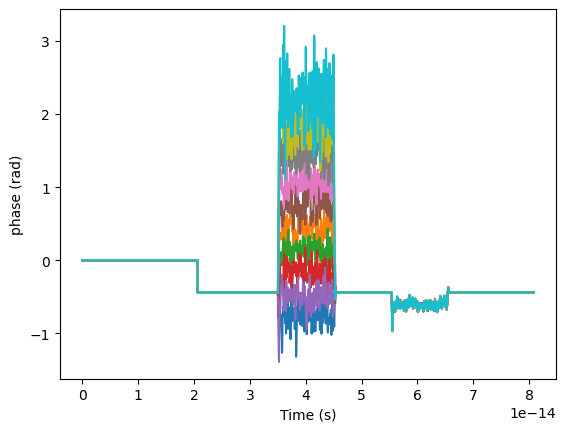

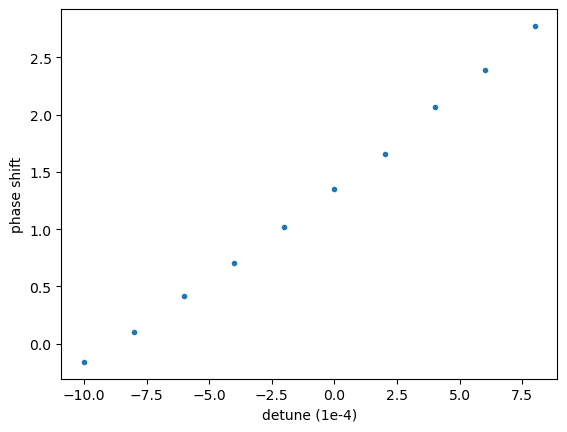

In [40]:
dphase = []
for count, phase in enumerate(angle_list):
    plt.figure(1)
    plt.plot(s, np.unwrap(phase))
    phase1 = np.mean(phase[(s>35e-15)&(s<45e-15)])
    phase2 = np.mean(phase[(s>55e-15)&(s<65e-15)])
    dphase.append(phase1 - phase2)

plt.xlabel('Time (s)')
plt.ylabel('phase (rad)')
plt.figure(2)
plt.plot(detune, dphase, '.')
plt.xlabel('detune (1e-4)')
plt.ylabel('phase shift')

In [ ]:
cspeed =299792458
h_Plank = 4.135667696e-15
npad = 1000

keys = sorted(G.field.keys())[0]
dfl = G.field[keys]['dfl']
nslice = dfl.shape[2]
param = G.field[keys]['param']
ncar = param['gridpoints']
dgrid = param['gridsize']
xlamds = param['wavelength']
dt = param['slicespacing']/cspeed

central = dfl[ncar//2+1, ncar//2+1, :] 
nslice_padded = nslice + 2*npad
s2 = np.arange(nslice_padded) * dt
s_fs2 = s2*1e15
hw0_eV = h_Plank * cspeed / xlamds
Dhw_eV = h_Plank / dt 
hws = hw0_eV + Dhw_eV / 2. * np.linspace(-1.,1., nslice_padded)

central_padded = np.pad(central, (npad, npad))
ftfld = np.fft.fftshift(np.fft.fft(central_padded, axis = 0), axes = 0)

plt.plot(hws, np.abs(ftfld)**2)
plt.xlim([1470, 1520])

In [15]:
np.random.randint(1,3, size = 10)

array([1, 1, 2, 1, 2, 2, 2, 2, 2, 1])

Text(0, 0.5, 'power after filtering')

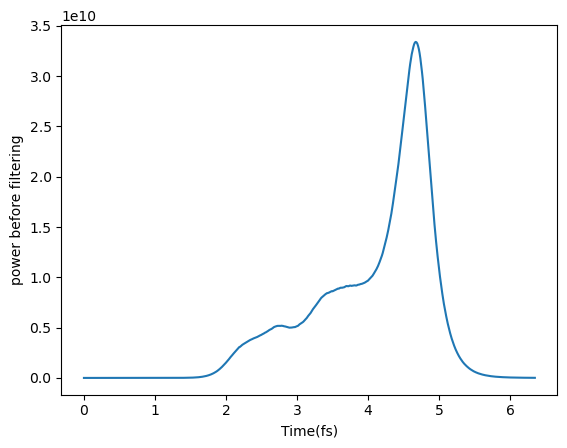

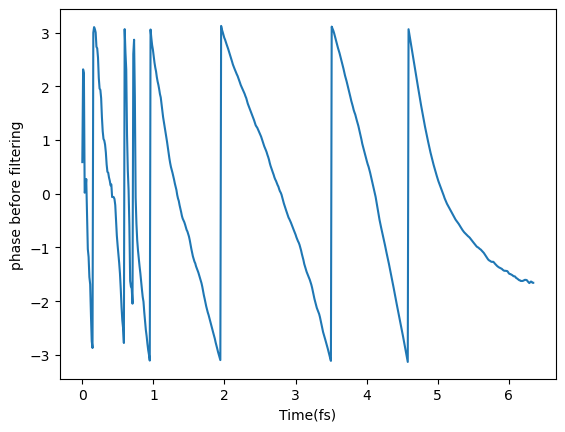

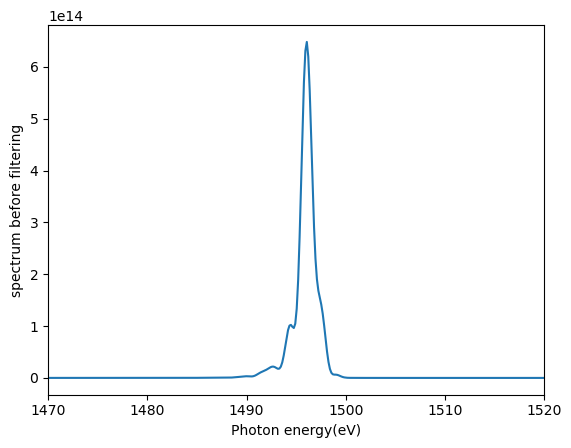

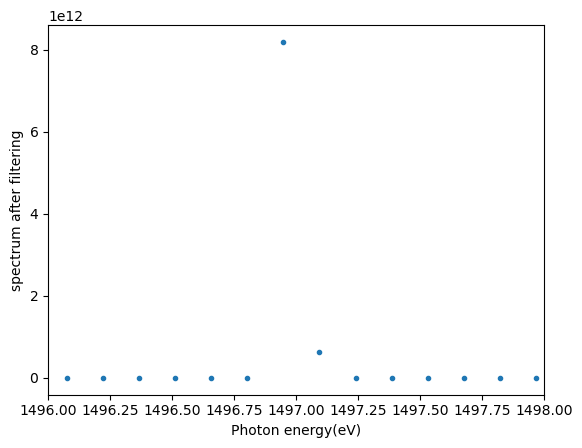

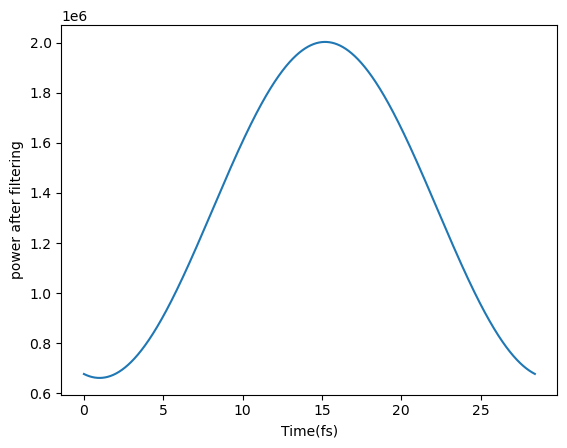

In [9]:

cspeed =299792458
h_Plank = 4.135667696e-15
npad = 1000
mask_center_eV = 1497

keys = sorted(G.field.keys())[0]
dfl = G.field[keys]['dfl']
nslice = dfl.shape[2]
param = G.field[keys]['param']
ncar = param['gridpoints']
dgrid = param['gridsize']
xlamds = param['wavelength']
dt = param['slicespacing']/cspeed

central = dfl[ncar//2+1, ncar//2+1, :] 
nslice_padded = nslice + 2*npad

s = np.arange(nslice) * dt
s_fs = s*1e15
s2 = np.arange(nslice_padded) * dt
s_fs2 = s2*1e15
hw0_eV = h_Plank * cspeed / xlamds
Dhw_eV = h_Plank / dt 
hws = hw0_eV + Dhw_eV / 2. * np.linspace(-1.,1., nslice_padded)


dfl_padded = np.pad(dfl, ( (0,0), (0,0), (npad, npad)))
ftfld = np.fft.fftshift(np.fft.fft(dfl_padded, axis = 2), axes = 2)


plt.figure(1)
plt.plot(s_fs, np.sum(np.abs(dfl )**2, axis = (0,1)))
plt.xlabel('Time(fs)')
plt.ylabel('power before filtering') 


plt.figure(2)
plt.plot(s_fs, np.angle(dfl[ncar//2 + 1, ncar//2+1, :] ))
plt.xlabel('Time(fs)')
plt.ylabel('phase before filtering') 
#plt.xlim([40,50])

plt.figure(3)
plt.plot(hws, np.sum(np.abs(ftfld)**2, axis = (0,1)) )
#plt.xlim([590,610])
plt.xlabel('Photon energy(eV)')
plt.ylabel('spectrum before filtering') 
plt.xlim([1470, 1520])


plt.figure(4)
mask_width_eV = 0.12/2.355
mask_eff = np.sqrt(0.1)
mask = mask_eff*np.exp(-1/2*(hws - mask_center_eV)**2/mask_width_eV**2)
ftfld_fltr = ftfld*mask[ np.newaxis, np.newaxis, :]
plt.plot(hws, np.sum(np.abs(ftfld_fltr)**2, axis = (0,1)),'.')
#plt.plot(hws,np.sum(np.abs(ftfld)**2, axis = (1,2)),'.')
plt.xlim([mask_center_eV-1, mask_center_eV+1])
plt.xlabel('Photon energy(eV)')
plt.ylabel('spectrum after filtering')

field_fltr = np.fft.ifft(np.fft.ifftshift(ftfld_fltr, axes = 2), axis = 2)
power = np.sum(np.abs(field_fltr )**2, axis = (0,1))
plt.figure(5)
plt.plot(s_fs2, power)
plt.xlabel('Time(fs)')
plt.ylabel('power after filtering') 



In [10]:
param['slicecount'] += npad*2

In [11]:
param

{'gridpoints': 301,
 'gridsize': 1.3333333333333333e-05,
 'refposition': 0.0,
 'wavelength': 8.27e-10,
 'slicecount': 2576,
 'slicespacing': 3.308e-09}

In [13]:
import h5py
with h5py.File("./output/seed"+str(count)+".h5", "w") as f:
    for key in param:
        f.create_dataset(key, data = [param[key]])
    for i in range(field_fltr.shape[2]):
        key = 'slice' + "{:06d}".format(i)
        g = f.create_group(key)
        g.create_dataset('field-real', data = np.real(field_fltr[:,:, i].flatten()))
        g.create_dataset('field-imag', data = np.imag(field_fltr[:,:, i].flatten()))

In [15]:
i

2575

In [15]:
G.output_info()

Output data

key                       value              unit
--------------------------------------------------
Beam/alphax               array: (1, 512)    rad
Beam/alphay               array: (1, 512)    rad
Beam/betax                array: (1, 512)    m
Beam/betay                array: (1, 512)    m
Beam/bunching             array: (1351, 512)  
Beam/bunchingphase        array: (1351, 512)  rad
Beam/current              array: (1, 512)    A
Beam/efield               array: (1351, 512)  eV/m
Beam/emitx                array: (1, 512)    m
Beam/emity                array: (1, 512)    m
Beam/energy               array: (1351, 512)  
Beam/energyspread         array: (1351, 512)  
Beam/pxposition           array: (1351, 512)  rad
Beam/pyposition           array: (1351, 512)  rad
Beam/xposition            array: (1351, 512)  m
Beam/xsize                array: (1351, 512)  m
Beam/yposition            array: (1351, 512)  m
Beam/ysize                array: (1351, 512)  m
Field/dgrid        

In [136]:
pulselen = 80e-15
sigma = 5e-15
peak_current = 2.0e3
NPTS = 1000
cspeed  = 299792458
SLEN = pulselen*cspeed
sigma_z = sigma*cspeed

S = np.linspace(0, SLEN, NPTS)

CURRENT = np.ones((NPTS,))*peak_current
CURRENT[S > SLEN/2 + sigma_z] = 0
CURRENT[S < SLEN/2 - sigma_z] = 0

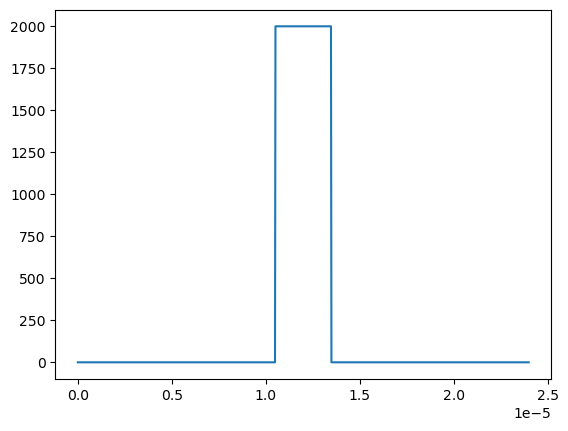

In [137]:
plt.plot(S, CURRENT)

In [7]:
import numpy as np
xlamds = (1.55e-9)/3
xlamdu = 0.039
gam0 = np.around(3990./0.511,3)
np.sqrt(xlamds/xlamdu*2*gam0**2-1)

0.7844736939534364